In [47]:
import numpy as np


def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r,max_k):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(max_k) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision_at_k(rs,max_k):
    return np.mean([average_precision(r,max_k) for r in rs])

# def dcg_at_k(r, k, method=0):
#     r = np.asfarray(r)[:k]
#     if r.size:
#         if method == 0:
#             return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
#         elif method == 1:
#             return np.sum(r / np.log2(np.arange(2, r.size + 2)))
#         else:
#             raise ValueError('method must be 0 or 1.')
#     return 0.


# def ndcg_at_k(r, k, method=0):
#     dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
#     if not dcg_max:
#         return 0.
#     return dcg_at_k(r, k, method) / dcg_max

#KAGGLE
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/statistics.csv')
df = df.dropna()
df.head(11)

,query,npmjs.com_optimal,npmsearch.com,M1,M2,M3,M4,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedBordaFuse,Filter_google.com_hyp_match
0,download free music,csv/statistics/npmjs.com_optimal_download free...,csv/statistics/npmsearch.com_download free mus...,csv/statistics/M1_download free music.csv,csv/statistics/M2_download free music.csv,csv/statistics/M3_download free music.csv,csv/statistics/M4_download free music.csv,csv/statistics/BordaFuse_download free music.csv,csv/statistics/Cordorcet_download free music.csv,csv/statistics/BoostedBordaFuse_download free ...,csv/statistics/WeightedBordaFuse_download free...,csv/statistics/Filter_google.com_hyp_match_dow...
1,detect text language,csv/statistics/npmjs.com_optimal_detect text l...,csv/statistics/npmsearch.com_detect text langu...,csv/statistics/M1_detect text language.csv,csv/statistics/M2_detect text language.csv,csv/statistics/M3_detect text language.csv,csv/statistics/M4_detect text language.csv,csv/statistics/BordaFuse_detect text language.csv,csv/statistics/Cordorcet_detect text language.csv,csv/statistics/BoostedBordaFuse_detect text la...,csv/statistics/WeightedBordaFuse_detect text l...,csv/statistics/Filter_google.com_hyp_match_det...
2,download web videos,csv/statistics/npmjs.com_optimal_download web ...,csv/statistics/npmsearch.com_download web vide...,csv/statistics/M1_download web videos.csv,csv/statistics/M2_download web videos.csv,csv/statistics/M3_download web videos.csv,csv/statistics/M4_download web videos.csv,csv/statistics/BordaFuse_download web videos.csv,csv/statistics/Cordorcet_download web videos.csv,csv/statistics/BoostedBordaFuse_download web v...,csv/statistics/WeightedBordaFuse_download web ...,csv/statistics/Filter_google.com_hyp_match_dow...
3,check valid email address,csv/statistics/npmjs.com_optimal_check valid e...,csv/statistics/npmsearch.com_check valid email...,csv/statistics/M1_check valid email address.csv,csv/statistics/M2_check valid email address.csv,csv/statistics/M3_check valid email address.csv,csv/statistics/M4_check valid email address.csv,csv/statistics/BordaFuse_check valid email add...,csv/statistics/Cordorcet_check valid email add...,csv/statistics/BoostedBordaFuse_check valid em...,csv/statistics/WeightedBordaFuse_check valid e...,csv/statistics/Filter_google.com_hyp_match_che...
4,send sms,csv/statistics/npmjs.com_optimal_send sms.csv,csv/statistics/npmsearch.com_send sms.csv,csv/statistics/M1_send sms.csv,csv/statistics/M2_send sms.csv,csv/statistics/M3_send sms.csv,csv/statistics/M4_send sms.csv,csv/statistics/BordaFuse_send sms.csv,csv/statistics/Cordorcet_send sms.csv,csv/statistics/BoostedBordaFuse_send sms.csv,csv/statistics/WeightedBordaFuse_send sms.csv,csv/statistics/Filter_google.com_hyp_match_sen...
5,health tracker,csv/statistics/npmjs.com_optimal_health tracke...,csv/statistics/npmsearch.com_health tracker.csv,csv/statistics/M1_health tracker.csv,csv/statistics/M2_health tracker.csv,csv/statistics/M3_health tracker.csv,csv/statistics/M4_health tracker.csv,csv/statistics/BordaFuse_health tracker.csv,csv/statistics/Cordorcet_health tracker.csv,csv/statistics/BoostedBordaFuse_health tracker...,csv/statistics/WeightedBordaFuse_health tracke...,csv/statistics/Filter_google.com_hyp_match_hea...
6,quick sort algorithm,csv/statistics/npmjs.com_optimal_quick sort al...,csv/statistics/npmsearch.com_quick sort algori...,csv/statistics/M1_quick sort algorithm.csv,csv/statistics/M2_quick sort algorithm.csv,csv/statistics/M3_quick sort algorithm.csv,csv/statistics/M4_quick sort algorithm.csv,csv/statistics/BordaFuse_quick sort algorithm.csv,csv/statistics/Cordorcet_quick sort algorithm.csv,csv/statistics/BoostedBordaFuse_quick sort alg...,csv/statistics/WeightedBordaFuse_quick sort al...,csv/statistics/Filter_google.com_hyp_match_qui...
7,credit card validation,csv/statistics/npmjs.com_optimal_credit card v...,csv/statistics/npmsearch.com_credit card valid...,csv/statistics/M1_credit card validation.csv,csv/statistics/M2_c

In [49]:
searchers = list(df).copy()
del searchers[0]

for query in range(df['query'].size):
    for searcher in range(len(searchers)):
        mt = pd.read_csv('../'+df.iloc[query][searcher+1])
        df.iloc[query][searcher+1] = mt
     

In [50]:
print(searchers)
print(df['query'].tolist())

['npmjs.com_optimal', 'npmsearch.com', 'M1', 'M2', 'M3', 'M4', 'BordaFuse', 'Cordorcet', 'BoostedBordaFuse', 'WeightedBordaFuse', 'Filter_google.com_hyp_match']
['download free music', 'detect text language', 'download web videos', 'check valid email address', 'send sms', 'health tracker', 'quick sort algorithm', 'credit card validation', 'third party authentication', 'calculate word similarity', 'mobilie app framework', 'convert typewritten image to text', 'user authentication', 'filter adult content images', 'lightweight 3D graphic library', 'convert text to speech', 'extract barcode from image', 'mathematical functions', 'sentiment analysis', 'rank aggregation algorithms', 'convert data formats', 'translate english to spanish', 'captcha authentication', 'DOM manipulation utils', 'scraper']


In [51]:
#df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])

max_k = 21
resultall = []
result_precision = []
result_hits = []
result_recall = []
result_fmeasure = []
result_ndcg_k = []
result_mean_average_precision = []

#Searchers Used
#print(searchers)
arr_searchers = pd.Series(['npmjs.com_optimal', 'npmsearch.com', 'M1', 'M2', 'M4', 'BordaFuse', 'Cordorcet', 'WeightedBordaFuse', 'Filter_google.com_hyp_match'])
#Queries Used
#print(df['query'].tolist())
arr_queries = pd.Series(['download free music', 'detect text language', 'download web videos', 'check valid email address', 
                         'send sms', 'health tracker', 'quick sort algorithm', 'credit card validation', 
                         'third party authentication', 'calculate word similarity', 'mobilie app framework', 
                         'convert typewritten image to text', 'user authentication', 'filter adult content images', 
                         'lightweight 3D graphic library', 'convert text to speech', 'extract barcode from image', 
                         'mathematical functions', 'sentiment analysis', 'rank aggregation algorithms', 
                         'convert data formats', 'translate english to spanish', 'captcha authentication', 
                         'DOM manipulation utils', 'scraper'])


#Calculo de precision, recall y hits
for k in range(1,max_k):
    #print(k)
    searchersrow = []
    row_precision = []
    row_hits = []
    row_recall = []
    row_fmeasure = []
    row_ndcg_k = []
    row_mean_average_precision = []
       
    for searcher in range(arr_searchers.size):
        #print(searchers[searcher])
        sum_hits = 0
        sum_precision = 0
        sum_recall = 0
        sum_fmeasure = 0
        sum_ndcg_k = 0
        arr_rs = []    
    
        for query in range(arr_queries.size):
            #print(arr_queries[query])
            idxq = df.index[df['query'] == arr_queries[query]].tolist()
            idxs = searchers.index(arr_searchers[searcher])
            sxq = df.iloc[idxq[0]][idxs+1]
            sxq = sxq.set_index('k')
            sum_hits += sxq.loc[k]['#hits']
            sum_precision += sxq.loc[k]['precision']
            sum_recall += sxq.loc[k]['recall']
            sum_fmeasure += sxq.loc[k]['fmeasure']
            sum_ndcg_k += ndcg_at_k(sxq['hit'],k)
            arr_rs.append(sxq['hit']);
            
        prom_hits = sum_hits/arr_queries.size
        prom_precision = sum_precision/arr_queries.size
        prom_recall = sum_recall/arr_queries.size
        prom_fmeasure = sum_fmeasure/arr_queries.size
        prom_ndcg_k = sum_ndcg_k/arr_queries.size
        mean_average_precision = mean_average_precision_at_k(arr_rs,k)
        #print(prom_hits)
        #print(prom_precision)
        #print(prom_recall)
        #print(prom_fmeasure)
        searcherprom = pd.DataFrame([[prom_hits,prom_precision,prom_recall,prom_fmeasure,prom_ndcg_k,mean_average_precision]],  columns =  ["hits", "precision", "recall", "fmeasure","ncdg","map"])
        searchersrow.append(searcherprom)
        row_precision.append(prom_precision)
        row_hits.append(prom_hits)
        row_recall.append(prom_recall)
        row_fmeasure.append(prom_fmeasure)
        row_ndcg_k.append(prom_ndcg_k)
        row_mean_average_precision.append(mean_average_precision)
    #print(searchersrow)
    resultall.append([k]+searchersrow)
    result_precision.append([k]+row_precision)
    result_hits.append([k]+row_hits)
    result_recall.append([k]+row_recall)
    result_fmeasure.append([k]+row_fmeasure)
    result_ndcg_k.append([k]+row_ndcg_k)
    result_mean_average_precision.append([k]+row_mean_average_precision)

columnsk = ['k'] + arr_searchers
dataframek = pd.DataFrame(resultall, columns =  ['k'] + arr_searchers.tolist())
dataframek = dataframek.set_index('k')
dataframek.head(3)

dataframe_hits = pd.DataFrame(result_hits, columns =  ['k'] + arr_searchers.tolist())
dataframe_recall = pd.DataFrame(result_recall, columns =  ['k'] + arr_searchers.tolist())
dataframe_fmeasure = pd.DataFrame(result_fmeasure, columns =  ['k'] + arr_searchers.tolist())
dataframe_precision = pd.DataFrame(result_precision, columns =  ['k'] + arr_searchers.tolist())
dataframe_ndcg_k = pd.DataFrame(result_ndcg_k, columns =  ['k'] + arr_searchers.tolist())
dataframe_average_precision = pd.DataFrame(result_mean_average_precision, columns =  ['k'] + arr_searchers.tolist())

dataframe_ndcg_k.head(20)


,k,npmjs.com_optimal,npmsearch.com,M1,M2,M4,BordaFuse,Cordorcet,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.600000,0.320000,0.760000,0.760000,0.520000,0.680000,0.800000,0.680000,0.640000
1,2,0.600000,0.345237,0.760000,0.760000,0.535474,0.726422,0.753578,0.726422,0.640000
2,3,0.606508,0.335852,0.728966,0.728966,0.551843,0.762458,0.745699,0.750195,0.662402
3,4,0.623990,0.330704,0.727656,0.720931,0.551480,0.766973,0.712900,0.765273,0.671845
4,5,0.635744,0.322115,0.735683,0.735088,0.567517,0.773396,0.724378,0.771696,0.697226
5,6,0.634752,0.328919,0.733168,0.736949,0.578277,0.752111,0.723076,0.750411,0.711311
6,7,0.631039,0.326749,0.735912,0.732016,0.581659,0.757373,0.731804,0.755673,0.711595
7,8,0.631293,0.331416,0.735699,0.735306,0.587338,0.764230,0.739433,0.762530,0.716726
8,9,0.636843,0.335224,0.746420,0.743225,0.599062,0.762551,0.737848,0.760851,0.714305
9,10,0.639316,0.333316,0.748698,0.748251,0.608313,0.760638,0.743648,0.758938,0.718450


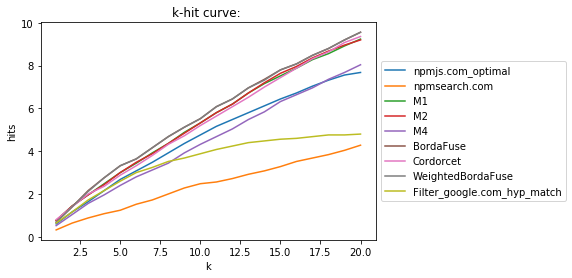

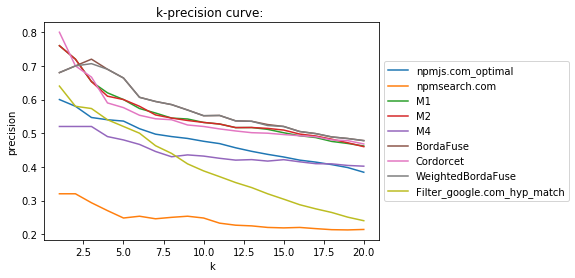

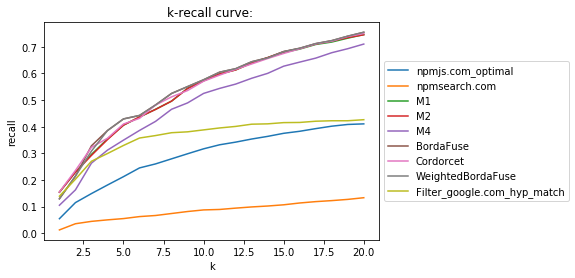

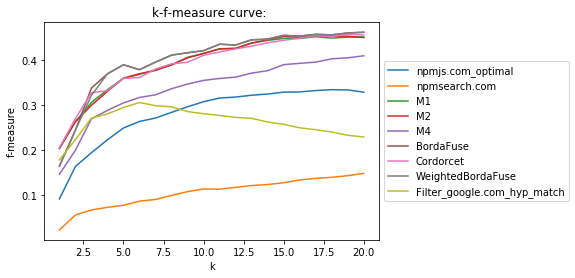

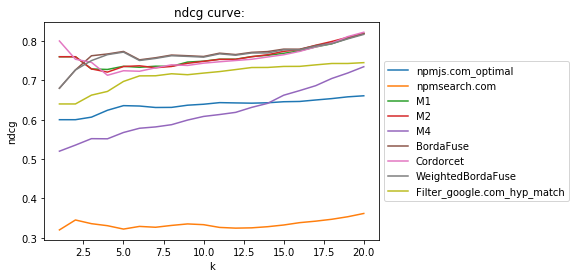

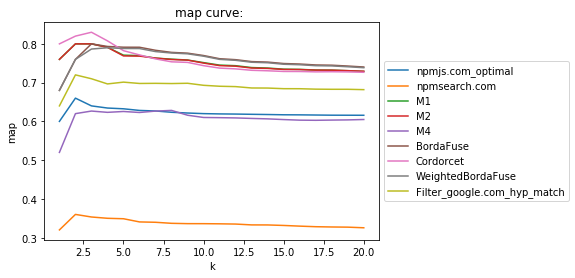

In [52]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_fmeasure)
    
pl.xlabel('k')
pl.ylabel('f-measure')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-f-measure curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_ndcg_k)
    
pl.xlabel('k')
pl.ylabel('ndcg')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('ndcg curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_average_precision)
    
pl.xlabel('k')
pl.ylabel('map')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('map curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()



In [53]:
dataframe_average_precision.head(20)

,k,npmjs.com_optimal,npmsearch.com,M1,M2,M4,BordaFuse,Cordorcet,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.600000,0.320000,0.760000,0.760000,0.520000,0.680000,0.800000,0.680000,0.640000
1,2,0.660000,0.360000,0.800000,0.800000,0.620000,0.760000,0.820000,0.760000,0.720000
2,3,0.640000,0.353333,0.800000,0.800000,0.626667,0.800000,0.830000,0.786667,0.710000
3,4,0.634444,0.350000,0.791111,0.791111,0.623333,0.793333,0.807778,0.790000,0.696667
4,5,0.632500,0.348833,0.770889,0.768889,0.625556,0.791389,0.782444,0.788056,0.701278
5,6,0.628267,0.340622,0.769722,0.768400,0.622978,0.791256,0.771456,0.787922,0.697856
6,7,0.626860,0.339698,0.763213,0.763295,0.626589,0.783440,0.761235,0.780106,0.698176
7,8,0.623522,0.337041,0.760562,0.759658,0.628332,0.778034,0.753656,0.776367,0.697624
8,9,0.621592,0.336183,0.758277,0.758110,0.615903,0.776032,0.752212,0.774366,0.698347
9,10,0.620034,0.336106,0.751662,0.750391,0.610103,0.769898,0.743767,0.768231,0.693094


In [55]:
dataframe_ndcg_k.head(20)

,k,npmjs.com_optimal,npmsearch.com,M1,M2,M4,BordaFuse,Cordorcet,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.600000,0.320000,0.760000,0.760000,0.520000,0.680000,0.800000,0.680000,0.640000
1,2,0.600000,0.345237,0.760000,0.760000,0.535474,0.726422,0.753578,0.726422,0.640000
2,3,0.606508,0.335852,0.728966,0.728966,0.551843,0.762458,0.745699,0.750195,0.662402
3,4,0.623990,0.330704,0.727656,0.720931,0.551480,0.766973,0.712900,0.765273,0.671845
4,5,0.635744,0.322115,0.735683,0.735088,0.567517,0.773396,0.724378,0.771696,0.697226
5,6,0.634752,0.328919,0.733168,0.736949,0.578277,0.752111,0.723076,0.750411,0.711311
6,7,0.631039,0.326749,0.735912,0.732016,0.581659,0.757373,0.731804,0.755673,0.711595
7,8,0.631293,0.331416,0.735699,0.735306,0.587338,0.764230,0.739433,0.762530,0.716726
8,9,0.636843,0.335224,0.746420,0.743225,0.599062,0.762551,0.737848,0.760851,0.714305
9,10,0.639316,0.333316,0.748698,0.748251,0.608313,0.760638,0.743648,0.758938,0.718450


In [32]:
for k in range(20):
    print(dcg_at_k([1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],k+1))

print(1.63/10)

1.0
1.63092975357
2.13092975357
2.56160631164
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
0.16299999999999998
